In [289]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def rule3(Aun, Bun):
    Qun = np.sqrt(Aun**2 + Bun**2)
    return Qun

def rule4(Q, Ae, Be, Aun, Bun, A, B):
    Qun = np.abs(Q)*np.sqrt(((Ae*Aun/A)**2)+((Be*Bun/B)**2))
    return Qun

In [290]:
# V= volts at indicated radius, r= radius (in meters)

V07 = 10.74; r07 = .070
V065 = 10.61; r065 = .065
V06 = 10.37; r06 = .060
V055 = 10.20; r055 = .055
V05 = 10.07; r05 = .050
V045 = 9.84; r045 = .045
V04 = 9.42; r04 = .040
V035 = 9.36; r035 = .035
V030 = 9.02; r030 = .030
V025 = 8.68; r025 = .025
V02 = 8.36; r02 = .020
V015 = 7.43; r015 = .015
V01 = 6.90; r01 = .010

r_un = .0005
V_un = .05

In [291]:
V_array = np.array ([V07, V065, V06, V055, V05, V045, V04, V035, V030, V025, V02, V015, V01])
r_array = np.array ([r07, r065, r06, r055, r05, r045, r04, r035, r030, r025, r02, r015, r01])

#two places past decimal
dV = np.diff(V_array)
dV_un = rule3(V_un, V_un)
print('We had volt changes of', dV, 'with an uncertainty of +/-', '%.2f' % dV_un, 'volts.\n')

#three places past decimal
dr = np.diff(-1 * r_array)
dr_un = rule3(r_un, r_un)
print('We had constant changes in radius of', dr[11:], 'with an uncertainty of +/-', '%.3f' % dr_un, 'meters.\n')

#one sigfig
Efield = ((-1 * dV)/dr)
Efield_un = (rule4(Efield, 1, -1, dV_un, dr_un, dV, dr)); Efield_unp = np.around(Efield_un, 0)
print('We calculated our electric fields (starting at .065m) to be', Efield, '\n with uncertainties of +/-', Efield_unp, 'volts per meter.\n')

#three sigfigs?
rmid = (.5 * (r_array[1:] + r_array[:-1]))
rmid_un = .5 * (rule3(r_un, r_un))
print('Average Radii:', rmid, 'with an uncertainty of +/-', '%.4f' % rmid_un, 'meters.\n')

#one sigfig
lnEfield = np.log(Efield); lnEfieldp = np.around(lnEfield, 2)
lnEfield_un = np.abs(np.log(np.average(Efield)) - np.log(np.average(Efield) + Efield_un)); lnEfield_unp = np.around(lnEfield_un, 2)
print ('ln Electric Field:', lnEfieldp, '\n with uncertainties of +/-', lnEfield_unp, '.\n')

#three sigfigs?
lnrmid = np.log(rmid); lnrmidp = np.around(lnrmid, 2)
lnrmid_un = np.abs(np.log(np.average(rmid))-np.log(np.average(rmid)+rmid_un))
print ('ln Average Radii:', lnrmidp, 'with an uncertainty of +/-', '%.2f' % lnrmid_un, '.\n')

We had volt changes of [-0.13 -0.24 -0.17 -0.13 -0.23 -0.42 -0.06 -0.34 -0.34 -0.32 -0.93 -0.53] with an uncertainty of +/- 0.07 volts.

We had constant changes in radius of [0.005] with an uncertainty of +/- 0.001 meters.

We calculated our electric fields (starting at .065m) to be [ 26.  48.  34.  26.  46.  84.  12.  68.  68.  64. 186. 106.] 
 with uncertainties of +/- [15. 16. 15. 15. 16. 18. 14. 17. 17. 17. 30. 21.] volts per meter.

Average Radii: [0.0675 0.0625 0.0575 0.0525 0.0475 0.0425 0.0375 0.0325 0.0275 0.0225
 0.0175 0.0125] with an uncertainty of +/- 0.0004 meters.

ln Electric Field: [3.26 3.87 3.53 3.26 3.83 4.43 2.48 4.22 4.22 4.16 5.23 4.66] 
 with uncertainties of +/- [0.21 0.22 0.21 0.21 0.22 0.25 0.2  0.24 0.24 0.23 0.38 0.28] .

ln Average Radii: [-2.7  -2.77 -2.86 -2.95 -3.05 -3.16 -3.28 -3.43 -3.59 -3.79 -4.05 -4.38] with an uncertainty of +/- 0.01 .



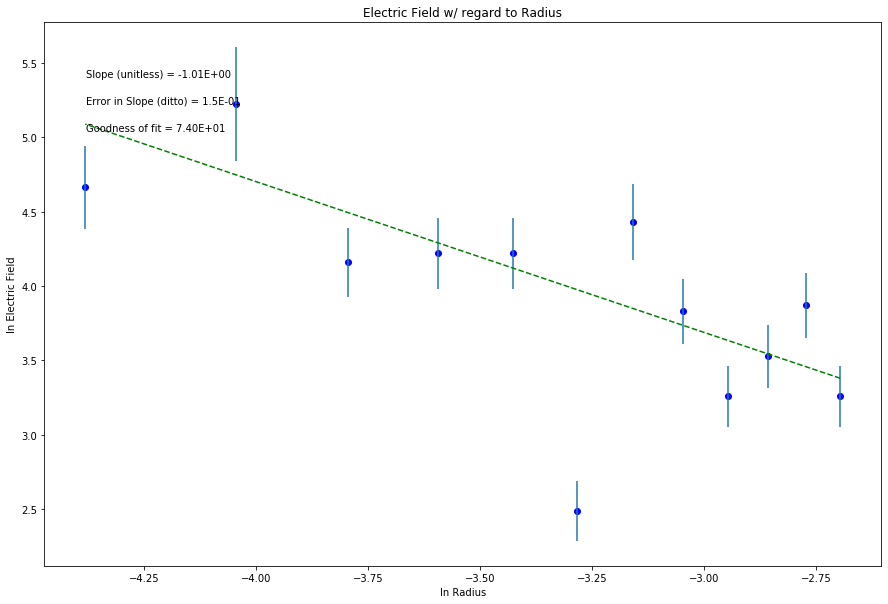

In [292]:
#Re-assign variables as x, y, dy so that the following code may remain generic

x = lnrmid   #this should be the array you want to plot on the x axis
y = lnEfield
dy = lnEfield_un  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln Radius')
plt.ylabel('ln Electric Field')
plt.title('Electric Field w/ regard to Radius')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (unitless) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (ditto) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()